In [120]:
import numpy as np
import pandas as pd
from io import StringIO
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.tree import export_graphviz
from sklearn import tree
import subprocess
from ipywidgets import interact, IntSlider, fixed, FloatSlider, Dropdown
import matplotlib.pyplot as plt

In [121]:
file = pd.read_csv('Alpha_bank.csv')
file.info()
file

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30477 entries, 0 to 30476
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             30477 non-null  int64 
 1   Job             30477 non-null  object
 2   Marital_Status  30477 non-null  object
 3   Education       30477 non-null  object
 4   Default_Credit  30477 non-null  object
 5   Housing_Loan    30477 non-null  object
 6   Personal_Loan   30477 non-null  object
 7   Subscribed      30477 non-null  object
dtypes: int64(1), object(7)
memory usage: 1.9+ MB


,Age,Job,Marital_Status,Education,Default_Credit,Housing_Loan,Personal_Loan,Subscribed
0,56,housemaid,married,Primary_Education,no,no,no,no
1,37,services,married,Secondary_Education,no,yes,no,no
2,40,admin.,married,Primary_Education,no,no,no,no
3,56,services,married,Secondary_Education,no,no,yes,no
4,59,admin.,married,Professional_Education,no,no,no,no
...,...,...,...,...,...,...,...,...
30472,73,retired,married,Professional_Education,no,yes,no,yes
30473,46,blue-collar,married,Professional_Education,no,no,no,no
30474,56,retired,married,Tertiary_Education,no,yes,no,no
30475,44,technician,married,Professional_Education,no,no,no,yes


In [122]:
def job(x):
  if x == 'housemaid':
      return 0
  elif x == 'services':
      return 1
  elif x=='admin.':
    return 2
  elif x=='technician':
    return 3
  elif x=='blue-collar':
    return 4
  elif x=='unemployed':
    return 5
  elif x=='retired':
    return 6
  elif x=='enterpreneur':
    return 7
  elif x=='management':
    return 8
  elif x=='self_employed':
    return 9
  elif x=='student':
    return 10
  else:
      return -1
def marital_status(x):
  if x == 'married':
      return 0
  elif x == 'divorced':
      return 1
  elif x=='single':
    return 2
  else:
      return -1
def education(x):
  if x == 'Primary_Education':
      return 0
  elif x == 'Secondary_Education':
      return 1
  elif x=='Professional_Education':
    return 2
  elif x=='Tertiary_Education':
    return 3
  else:
    return -1
def default_credit(x):
    if x == 'no':
        return 0
    elif x == 'yes':
        return 1  
    else:
        return -1
def housing_loan(x):
  if x == 'no':
      return 0
  elif x == 'yes':
      return 1
  else:
      return -1
def personal_loan(x):
  if x=='no':
    return 0
  elif x=='yes':
    return 1
  else:
    return -1
def subscribed(x):
  if x=='no':
    return 0
  elif x=='yes':
    return 1
  else:
    return -1
file['Job'] = file['Job'].apply(job)
file['Marital_Status'] = file['Marital_Status'].apply(marital_status)
file['Education'] = file['Education'].apply(education)
file['Default_Credit'] = file['Default_Credit'].apply(default_credit)
file['Housing_Loan'] = file['Housing_Loan'].apply(housing_loan)
file['Personal_Loan'] = file['Personal_Loan'].apply(personal_loan)
file['Subscribed'] = file['Subscribed'].apply(subscribed)


In [123]:
file_new = file.columns.tolist()
target = file_new.pop(3)
x = file[file_new]
y = file[target]

In [124]:
x_train, x_test, y_train, y_test=train_test_split(file, y, test_size=0.15)

In [125]:
def tree_model(criterion, max_depth, min_samples_leaf, random_state):
    fig, ax = plt.subplots(1, 2, figsize=(12, 8))
    ax[1].scatter(x_train.iloc[:,0], x_train.iloc[:,1], c=y_train)
    tree1 = DecisionTreeClassifier(criterion = criterion, max_depth = max_depth, min_samples_leaf = min_samples_leaf, random_state=random_state)
    tree1 = tree1.fit(x_train, y_train)
    tree_pred = tree1.predict(x_test)
    for i in precision_recall_fscore_support(y_test, tree_pred):
        print(i[0], i[1])
    plt.show()
interact(tree_model, 
             criterion = Dropdown(options = ["gini", "entropy"], value = "entropy"),
             max_depth = IntSlider(min = 1, max = 10, value = 3),
             min_samples_leaf = IntSlider(min = 1, max = 10, value = 1),
             random_state = IntSlider(min = 100, max = 1000, value = 300, step = 10),
)

interactive(children=(Dropdown(description='criterion', index=1, options=('gini', 'entropy'), value='entropy')…

<function __main__.tree_model>

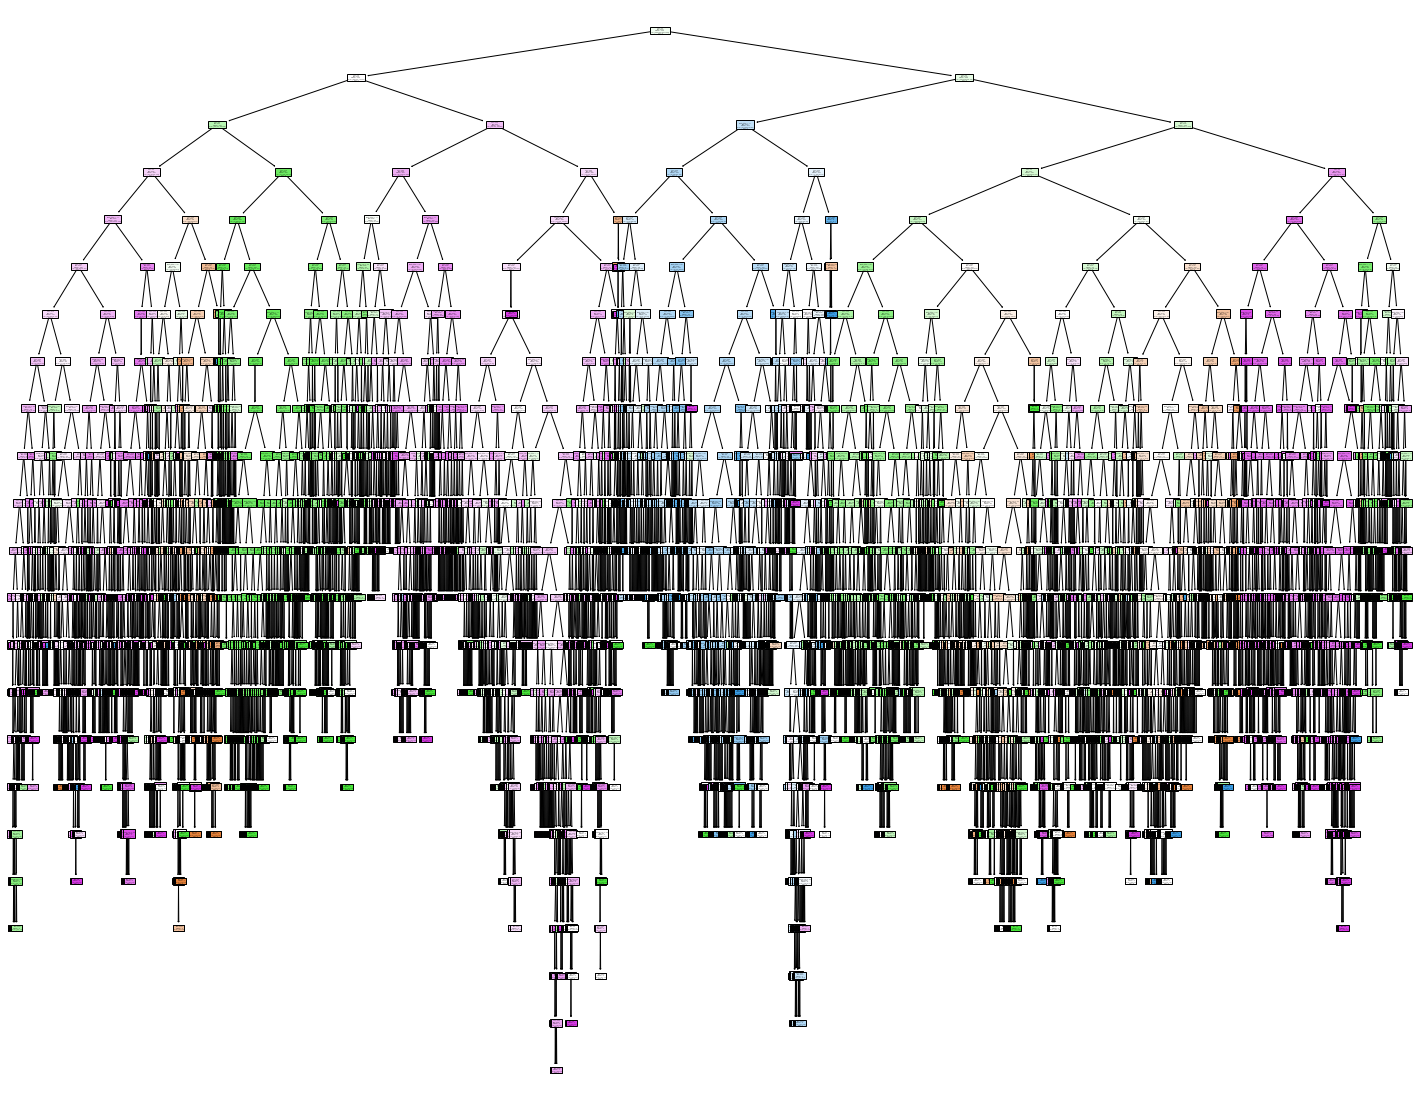

In [126]:
clf = DecisionTreeClassifier()
model = clf.fit(x, y)

fig = plt.figure(figsize = (25,20))
_ = tree.plot_tree(clf, 
                   feature_names = file_new,  
                   class_names = target,
                   filled = True)

In [128]:
forest = RandomForestClassifier()
forest.fit(x_train, y_train)
y_hat2 = forest.predict(x_test)
for i in precision_recall_fscore_support(y_test, y_hat2):
    print(i[0], i[1])

1.0 1.0
1.0 1.0
1.0 1.0
586 1793
